# 0. Individual and combined block visualization script

In order to analyze the block creation and therefore the dataset creation, in this notebook the blocks will be visualized individually and alongside each other to visually inspect whether the blocking had the desired effect.

## Imports

In [49]:
# For paths
import os 

# For data processing
import numpy as np
import math

# For 3D visualization
import open3d as o3d
import matplotlib.pyplot as plt

## Functions

In [75]:
def load_entire_sample(path_to_sample_folder):
    """Loading entire sample points into array from folder

    Args:
        path_to_sample_folder (str): string leading to sample folder containing block files

    Returns:
        np.ndarray: array of points from the entire sample [N, 6]
    """
    sample_points_list = []
    for i in range(len(os.listdir(path_to_sample_folder))):
        block_points = np.load(os.path.join(path_to_sample_folder, f'block_{i}.npy'))
        sample_points_list.extend(block_points)
    sample_points = np.array(sample_points_list)
    return sample_points


def load_single_block(block_id, path_to_sample_folder):
    """Load single block point data into array

    Args:
        block_id (int): integer describing block id to be displayed
        path_to_sample_folder (str): path to the sample folder containing block file

    Returns:
        np.ndarray: array holding the point data for the specified block
    """
    path_to_block = os.path.join(path_to_sample_folder, f'block_{block_id}.npy')
    block_data = np.load(path_to_block)
    return block_data


def load_multiple_blocks(block_ids, path_to_sample_folder):
    """Load multiple blocks and split coordinates separately and rgb array from point data

    Args:
        block_ids (list): list of integers defining which blocks to be loaded
        path_to_sample_folder (str): path the sample folder containing all blocks

    Returns:
        list: block_data - list containing the block data of the specified blocks
        list: x_block_coords - list containing x-coordinates per block loaded 
        list: y_block_coords - list containing y-coordinates per block loaded
        list: z_block_coords - list containing z-coordinates per block loaded
        list: rgb_arrays - list of arrays containing rgb values per block
    """
    if len(block_ids) < 2:
        print('Block ID list error. Please check amount of blocks picked and format it to list.')
        return None
    block_paths = []
    # Creation of path list for loading
    for block_id in block_ids:
        path_to_block = os.path.join(path_to_sample_folder, f'block_{block_id}.npy')
        block_paths.append(path_to_block)
    # Creation of placeholders to hold information for return
    block_data = []
    x_block_coords = []
    y_block_coords = []
    z_block_coords = []
    rgb_arrays = []
    # Looping through path list to fill placeholders
    for i in range(len(block_paths)):
        block_i_data = np.load(block_paths[i])
        block_data.append(block_i_data)
        block_x, block_y, block_z = pull_xyz_coords(block_i_data)
        x_block_coords.append(block_x)
        y_block_coords.append(block_y)
        z_block_coords.append(block_z)
        block_i_rgb_array = create_rgb_list(block_i_data)
        rgb_arrays.append(block_i_rgb_array)
    return block_data, x_block_coords, y_block_coords, z_block_coords, rgb_arrays


def pull_xyz_coords(point_data):
    """Pulling out X-, Y- and Z-coordinates separately from combined point data

    Args:
        point_data (np.ndarray): array of point data of an entire sample [N, 6]

    Returns:
        np.ndarray: X-coordinates, Y-coordinates, Z-coordinates
    """
    x_coords = point_data[:,0]
    y_coords = point_data[:,1]
    z_coords = point_data[:,2]
    return x_coords, y_coords, z_coords


def create_rgb_list(point_data):
    """Generate standalone rgb array from point data input

    Args:
        point_data (np.ndarray): array holding point data [N, F]

    Returns:
        np.ndarray: array holding rgb-values of input point data
    """
    # Pulling color channels individually
    red_c = point_data[:,3]
    green_c = point_data[:,4]
    blue_c = point_data[:,5]
    # Shifting/ Normalizing color range to [0,1]
    red_c = (red_c - np.min(red_c)) / (np.max(red_c) - np.min(red_c))
    green_c = (green_c - np.min(green_c)) / (np.max(green_c) - np.min(green_c))
    blue_c = (blue_c - np.min(blue_c)) / (np.max(blue_c) - np.min(blue_c))
    # Creating rgb list array to return
    rgb_array = np.ones((point_data.shape[0], 3))
    rgb_array[:,0] = red_c
    rgb_array[:,1] = green_c
    rgb_array[:,2] = blue_c
    return rgb_array


def plot_points_3D(x_coords, y_coords, z_coords, rgb_array, point_size=1, topview=False):
    """Create and display figure of 3D-point data

    Args:
        x_coords (np.ndarray): array holding per point x-coordinates [N, 1]
        y_coords (np.ndarray): array holding per point y-coordinates [N, 1]
        z_coords (np.ndarray): array holding per point z-coordinates [N, 1]
        rgb_array (np.ndarray): array holding per point rgb-values [N, 3]
        point_size (int, optional): integer or array of ints defining point size(s). Defaults to 1.
        topview (bool, optional): boolean indicating if point cloud should be viewed fromt he top. Defaults to False.
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_coords,
               y_coords,
               z_coords, 
               c=rgb_array,
               s=point_size)
    if topview:
        ax.view_init(elev=90, azim=-90)
    plt.show()


def plot_multiple_blocks(x_blocks, y_blocks, z_blocks, blocks_rgb_array, pointsize=0.1, topview=True):
    """Create and display plot of multiple blocks of point data

    Args:
        x_blocks (list): list containing arrays of x-coordinates per block
        y_blocks (list): list containing arrays of y-coordinates per block
        z_blocks (list): list containing arrays of z-coordinates per block
        blocks_rgb_array (list): list of arrays containing rgb-values per block
        pointsize (float, optional): float or list of floats defining general or individual point size(s). Defaults to 0.1.
        topview (bool, optional): boolean defining top perspective of point cloud or not. Defaults to True.
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")
    for i in range(len(blocks_rgb_array)):
        ax.scatter(x_blocks[i], 
                   y_blocks[i], 
                   z_blocks[i], 
                   c=blocks_rgb_array[i],
                   s=pointsize)
    if topview:
        ax.view_init(elev=90, azim=-90)
    plt.show()


def plot_block_in_sample(x_block, y_block, z_block, block_rgb_array,
                         x_sample, y_sample, z_sample, sample_rgb_array,
                         block_pointsize=0.1, sample_pointsize=0.05, topview=True):
    """Create and display plot of block over greyed out entire sample

    Args:
        x_block (np.ndarray): array containing x-coordinates of blocks to be highlighted
        y_block (np.ndarray): array containing y-coordinates of blocks to be highlighted
        z_block (np.ndarray): array containing z-coordinates of blocks to be highlighted
        block_rgb_array (np.ndarray): array containing rgb-values of blocks to be displayed
        x_sample (np.ndarray): array containing x-coordinates of entire sample
        y_sample (np.ndarray): array containing y-coordinates of entire sample
        z_sample (np.ndarray): array containing z-coordinates of entire sample
        sample_rgb_array (np.ndarray): array containing rgb values of entire sample
        block_pointsize (float, optional): float or array of floats defining point size for block points to be displayed. Defaults to 0.1.
        sample_pointsize (float, optional): float or array of floats defining point size for the greyed out entire sample. Defaults to 0.05.
        topview (bool, optional): boolean defining top-perspective of point cloud. Defaults to True.
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_sample, y_sample, z_sample, c=sample_rgb_array, s=sample_pointsize)
    # Elevate z coordinate for visibility over greyed out sample
    z_block += 20
    ax.scatter(x_block, y_block, z_block, c=block_rgb_array, s=block_pointsize)
    if topview:
        ax.view_init(elev=90, azim=-90)
    plt.show()


def plot_blocks_in_sample(x_blocks, y_blocks, z_blocks, blocks_rgb_array,
                          x_sample, y_sample, z_sample, sample_rgb_array, 
                          block_pointsize=0.1, sample_pointsize=0.05, topview=True):
    """Create and display plot of several blocks over greyed out entire sample

    Args:
        x_blocks (list): list containing arrays of x-coordinates per block
        y_blocks (list): list containing arrays of y-coordinates per blockion_
        z_blocks (list): list containing arrays of z-coordinates per block
        blocks_rgb_array (_type_): list of arrays containing rgb-values per block
        x_sample (np.ndarray): array containing x-coordinates of entire sample
        y_sample (np.ndarray): array containing y-coordinates of entire sample
        z_sample (np.ndarray): array containing z-coordinates of entire sample
        sample_rgb_array (np.ndarray): array containing rgb values of entire sample
        block_pointsize (float, optional): float or array of floats defining point size for block points to be displayed. Defaults to 0.1.
        sample_pointsize (float, optional): float or array of floats defining point size for the greyed out entire sample. Defaults to 0.05.
        topview (bool, optional): boolean defining top-perspective of point cloud. Defaults to True.
    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_sample, y_sample, z_sample, c=sample_rgb_array, s=sample_pointsize)
    for i in range(len(blocks_rgb_array)):
        z_block = z_blocks[i] + 30
        ax.scatter(x_blocks[i], y_blocks[i], z_block, c=blocks_rgb_array[i], s=block_pointsize)
    if topview:
        ax.view_init(elev=90, azim=-90)
    plt.show()


def create_block_center(block_min, block_max):
    """Determine and return x-, y- and z-coordinate of block center based on the blocks MIN and MAX points

    Args:
        block_min (np.ndarray): array with minimum x-, y- and z-coordinate of a block [1, 3]
        block_max (np.ndarray): array with maximum x-, y- and z-coordinate of a block [1, 3]

    Returns:
        np.ndarray: x-, y- and z-coordinate of block center
    """
    block_center_x = block_min[0] + (block_max[0]-block_min[0])/2
    block_center_y = block_min[1] + (block_max[1]-block_min[1])/2
    block_center = [block_center_x, block_center_y, 0]
    return block_center


def get_num_unique_and_repeated_points(point_data):
    """Return number of unique points and over-sampled points of point data

    Args:
        point_data (np.ndarray): array holding point data [N, F]

    Returns:
        int: num_unique_points - amount of unique points detected in point data
        int: num_repeated_points - amount of repeated/ over-sampled points in point data
    """
    num_unique_points = len(np.unique(point_data, axis=0))
    num_repeated_points = len(point_data) - num_unique_points
    return num_unique_points, num_repeated_points


def print_single_block_stats(block_min, block_max, block_center, block_mean, 
                             num_unique_points, num_repeated_points):
    print(f'This block starts at: {block_min}')
    print(f'This block ends at: {block_max}')
    print(f'The true block center is at: {block_center}')
    print(f'While the block mean is at: {block_mean}')
    print(f'It exhibits {num_unique_points} unique points.')
    print(f'And therefore has {num_repeated_points} duplicates.')
    

def print_multiple_block_stats(block_ids, block_mins, block_maxs, block_centers, block_means, 
                               num_unique_points_list, num_repeated_points_list):
    for i in range(len(block_centers)):
        print(f'========== Statistics for block {block_ids[i]} ----------')
        print(f'This block starts at: {block_mins[i]}')
        print(f'This block ends at: {block_maxs[i]}')
        print(f'The true block center is at: {block_centers[i]}')
        print(f'While the block mean is at: {block_means[i]}')
        print(f'It exhibits {num_unique_points_list[i]} unique points.')
        print(f'And therefore has {num_repeated_points_list[i]} duplicates.')

## General variables needed

Below all the variables for loading the correct data will be set. This includes the block number to be investigated as well as the creation of the correct path to the respective file.

In [51]:
# Setting parameters for data loading
machine = 'laptop' #'laptop' / 'machine'
if machine == 'laptop':
    path_to_sample = '/Users/nk/Documents/GitHubRepos/Pointnet_Pointnet2_pytorch/data/samples/train/sample_0'
else:
    path_to_sample = 'will be inserted'

# 1. Single block visualization

We will start out with the visualization of a single block. Therefore, the corresponding block will have to be loaded in and subsequently visualised, once within open3d and once with matplotlib.

## 1.1 Block data loading

### 1.1.1 Block choice

In [52]:
block_id = 27

### 1.1.2 Block loading

In [53]:
viz_block = load_single_block(block_id, path_to_sample)
x_block, y_block, z_block = pull_xyz_coords(viz_block)
block_rgb_array = create_rgb_list(viz_block)

## 1.2 Block visualization

Now, all information is in place to visualize the single block. Below, the block will be visualized normally first and secondly from the bird perspective, in order to investigate its shape

### 1.2.1 Regular view

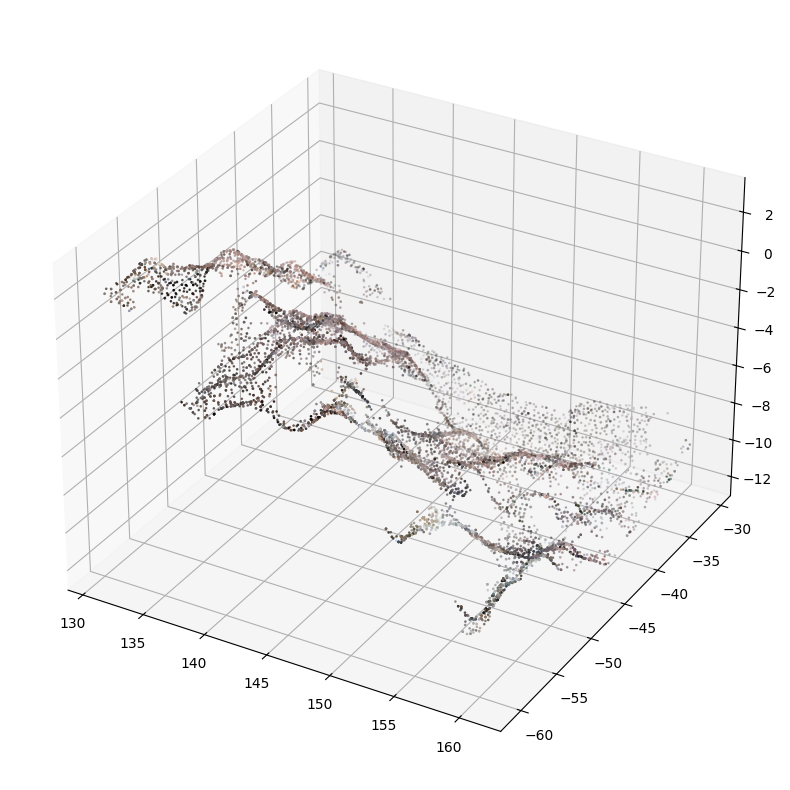

In [54]:
plot_points_3D(x_block, 
               y_block,
               z_block,
               block_rgb_array,
               point_size=0.75)

### 1.2.2 Birds perspective

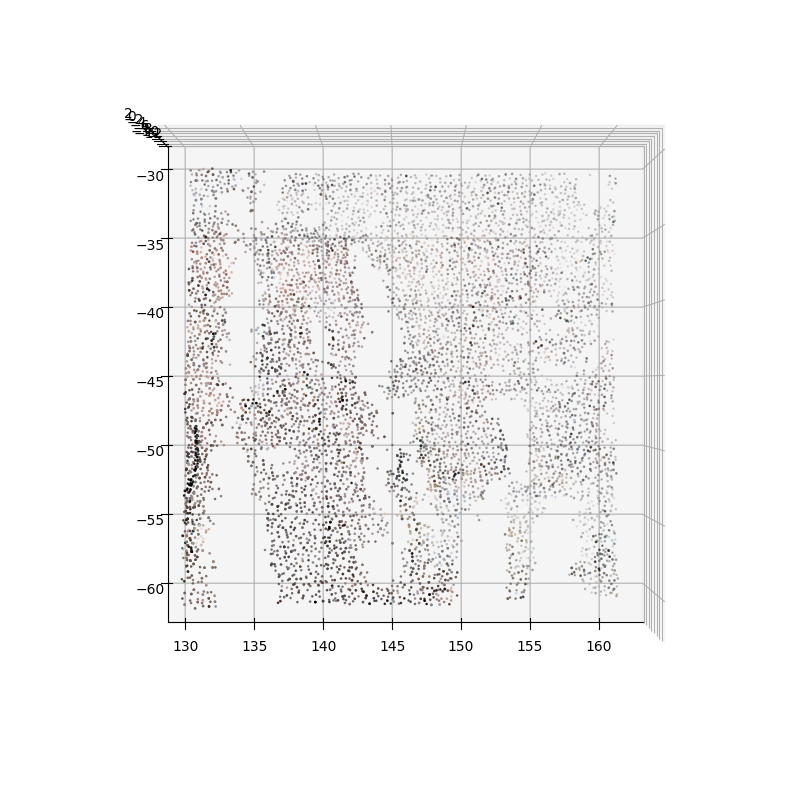

In [55]:
plot_points_3D(x_block, 
               y_block,
               z_block,
               block_rgb_array,
               point_size=0.75,
               topview=True)

### 1.2.3 With entire sample

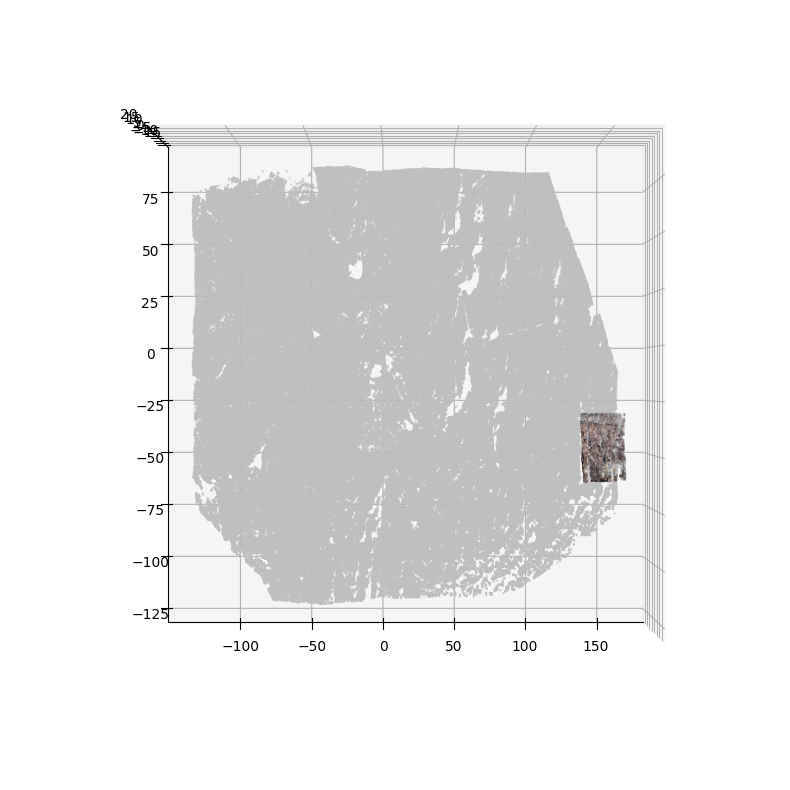

In [56]:
sample_points = load_entire_sample(path_to_sample)
x_sample, y_sample, z_sample = pull_xyz_coords(sample_points)
sample_rgb_array = np.stack(([0.75] * len(sample_points),
                             [0.75] * len(sample_points),
                             [0.75] * len(sample_points)), axis=1)
plot_block_in_sample(x_block, y_block, z_block, block_rgb_array,
                     x_sample, y_sample, z_sample, sample_rgb_array)

## 1.3 Single block statistics

In order to get an even better picture of the individual block, we will also investigate the block not only visually, but also considering its key statistics.

In [57]:
num_unique_points, num_repeated_points = get_num_unique_and_repeated_points(viz_block)
block_min = np.min(viz_block[:, :3], axis=0)
block_max = np.max(viz_block[:, :3], axis=0)
block_center = create_block_center(block_min, block_max)
block_mean = np.mean(viz_block[:, :3], axis=0)
print_single_block_stats(block_min, block_max, block_center, block_mean, num_unique_points, num_repeated_points)


This block starts at: [130.96158046 -60.60579961   8.02933436]
This block ends at: [160.95893436 -30.61745429  22.6875746 ]
The true block center is at: [145.96025740521748, -45.6116269478566, 0]
While the block mean is at: [145.62168804 -44.67536307  13.84131679]
It exhibits 6913 unique points.
And therefore has 3327 duplicates.


# 2. Multiple block visualization

For general analysis it would be interesting to potentially investigate several blocks, either next to each other or distant blocks, and set them into the context of the overall sample as well. Therefore a similar mechanism for mutiple blocks will be prepared below.

## 2.1 Block data loading

### 2.1.1 Block choice

Here the respective blocks will be named/ selected and the paths for loading will be created.

In [58]:
block_ids = [56, 57]

### 2.1.2 Data loading

In [59]:
block_data, x_blocks, y_blocks, z_blocks, rgb_array = load_multiple_blocks(block_ids, path_to_sample)

## 2.2 Blocks visualization

### 2.2.1 Regular view

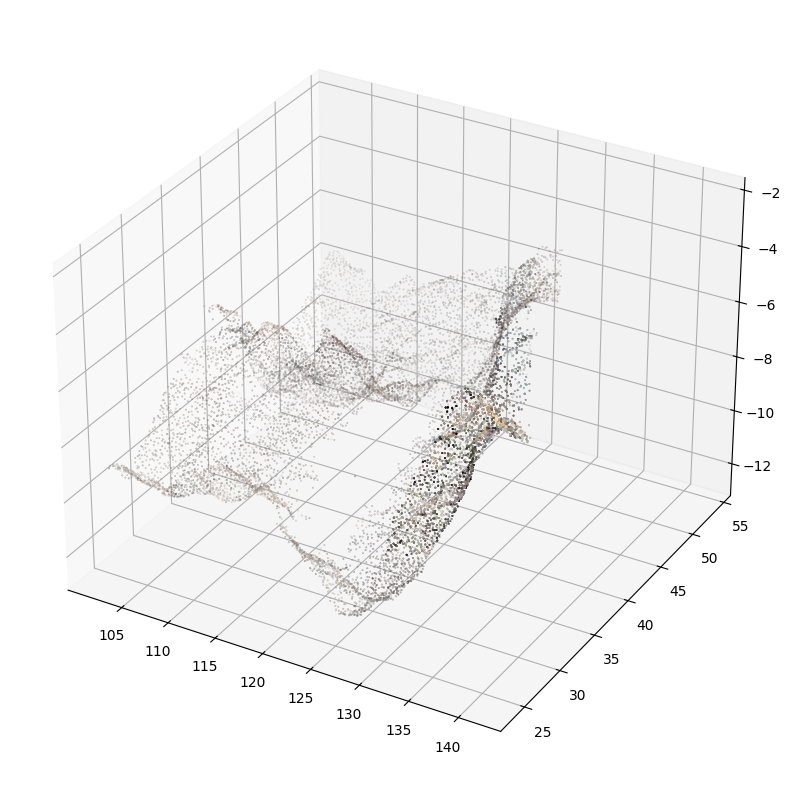

In [60]:
plot_multiple_blocks(x_blocks, y_blocks, z_blocks, rgb_array, topview=False)

### 2.2.2 Birds-perspective

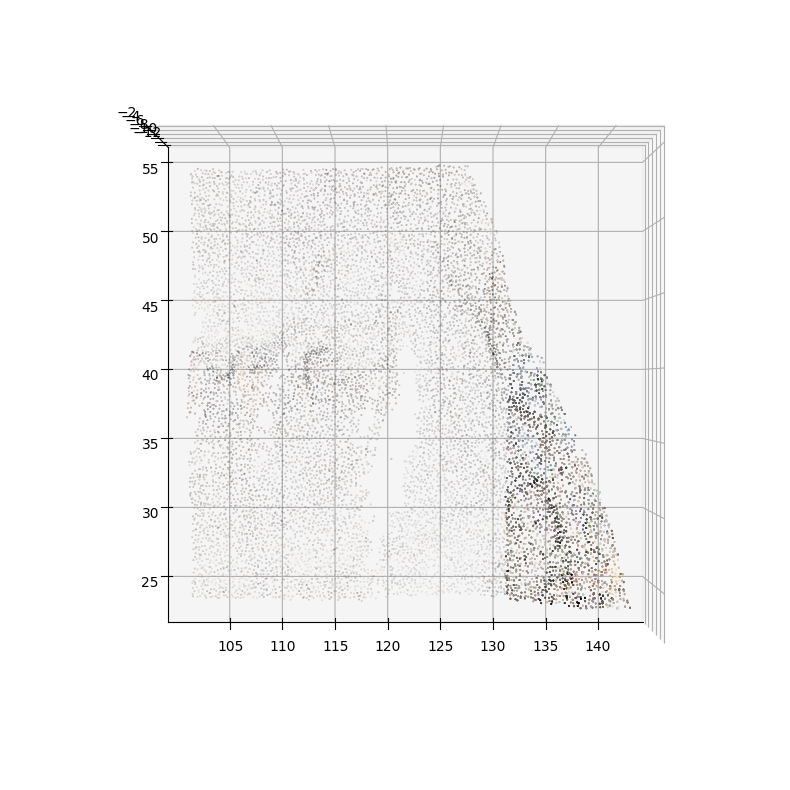

In [61]:
plot_multiple_blocks(x_blocks, y_blocks, z_blocks, rgb_array)

### 2.2.3 With entire sample

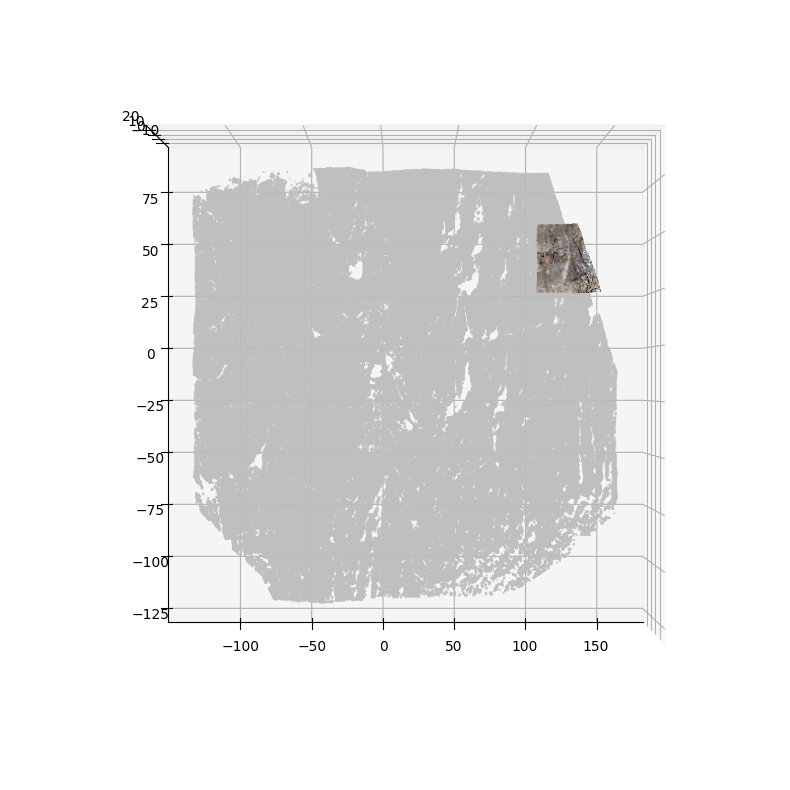

In [73]:
sample_points = load_entire_sample(path_to_sample)
x_sample, y_sample, z_sample = pull_xyz_coords(sample_points)
sample_rgb_array = np.stack(([0.75] * len(sample_points),
                             [0.75] * len(sample_points),
                             [0.75] * len(sample_points)), axis=1)
#TODO: check whether this works properly
plot_blocks_in_sample(x_blocks, y_blocks, z_blocks, rgb_array,
                      x_sample, y_sample, z_sample, sample_rgb_array)

## 2.3 Multiple blocks statistics

In [76]:
num_unique_points_list = []
num_repeated_points_list = []
block_mins = []
block_maxs = []
block_means = []
block_centers = []
for i in range(len(rgb_array)):
    num_unique_points, num_repeated_points = get_num_unique_and_repeated_points(block_data[i])
    block_i_min = np.min(block_data[i][:,:3], axis=0)
    block_i_max = np.max(block_data[i][:,:3], axis=0)
    block_i_mean = np.mean(block_data[i][:,:3], axis=0)
    block_i_center = create_block_center(block_i_min, block_i_max)
    num_unique_points_list.append(num_unique_points)
    num_repeated_points_list.append(num_repeated_points)
    block_mins.append(block_i_min)
    block_maxs.append(block_i_max)
    block_means.append(block_i_mean)
    block_centers.append(block_i_center)

print_multiple_block_stats(block_ids, block_mins, block_maxs, block_centers, block_means, num_unique_points_list, num_repeated_points_list)

========== Statistics for block 56 ----------
This block starts at: [102.02898454  23.90220391 -12.46917011]
This block ends at: [132.02265647  53.89558556  -3.0349791 ]
The true block center is at: [117.02582050241077, 38.898894733699024, 0]
While the block mean is at: [116.71476529  38.9617406   -8.60707243]
It exhibits 10240 unique points.
And therefore has 0 duplicates.
========== Statistics for block 57 ----------
This block starts at: [130.96478357  23.9030212  -10.26952982]
This block ends at: [141.33644431  43.96900528  -2.2998079 ]
The true block center is at: [136.15061394013634, 33.936013241515624, 0]
While the block mean is at: [134.78724863  30.76233359  -6.14339847]
It exhibits 1773 unique points.
And therefore has 8467 duplicates.


# 3. Entire sample block visualization and analysis

This is the placeholder for the entire sample analysis. In this section it is not necessarily about displaying and analysing individual blocks, but much rather about how certain characteristics, such as the number of fracture points, unqiue points and centers are distributed among the entire sample. So it may be an idea to display averages for the entire sample and then also displaying the maximum ad minimum values for that range to get a better feeling and understanding of the dispersion and variability of those numbers.

## 3.1 Data loading

In [ ]:
# Loading in the entire sample
sample_points_list = []
for i in range(len(os.listdir(path_to_sample))):
    block_points = np.load(os.path.join(path_to_sample, f'block_{i}.npy'))
    sample_points_list.extend(block_points)
sample_points = np.array(sample_points_list)

## 3.2 Sample visualisation

## 3.3 Sample-block statistics

# Conclusion

This notebook contains the functions to display and quickly analyze a single block of the sample, and additionally also being able to take multiple blocks into account and visualize and analyze these individually. From our first inspection and analysis it looks like the blocks have been formed correctly and contain a stable mix of fracture and non-fracture points. Therefore, besides potentially integrating an entire sample block overview and analysis, the visualization and analysis of blocks of a sample can be done with this notebook. 